In [ ]:
import cv2
import os

import glob
from google.colab import drive
import matplotlib.pyplot as plt  # Optionally import for displaying images

# Specify the folder path within your Drive
folder_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/crop_images'  # Replace with your actual path

# List image files (adjust extensions as needed)
image_folder_paths = glob.glob(os.path.join(folder_path, "*"))
all_images = []
for i in image_folder_paths:

  image_paths = glob.glob(os.path.join(i, "*"))

  for image_path in image_paths:
      print(image_path)
      if not os.path.isfile(image_path):
          continue  # Skip non-image files


      img = cv2.imread(image_path)  # Replace with your preferred library and method
      image=cv2.resize(img,(224,224))
      # Optionally display the image
      #plt.imshow(image)
      #plt.show()

      # Add to a list or dictionary if needed
      all_images.append(image)

# Further processing or use the loaded images...


In [2]:
import pandas as pd

import numpy as np
all_images=np.array(all_images)
all_images.shape

(38, 224, 224, 3)

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:


data_aug= keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("vertical",input_shape=(640, 640, 3)),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomZoom(0.8),
  ]
)
cnn = models.Sequential([
    #data_aug,
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=( 640, 640, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=( 640, 640, 3)),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=( 640, 640, 3)),
    # layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
features_cnn=cnn.predict(all_images)

2/2 [==============================] - 9s 2s/step


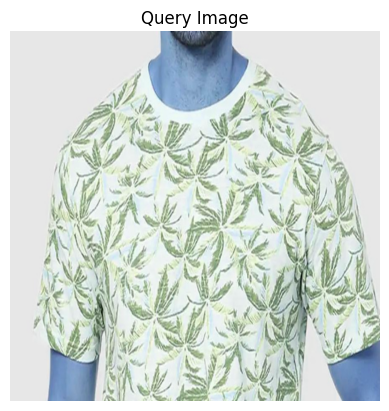

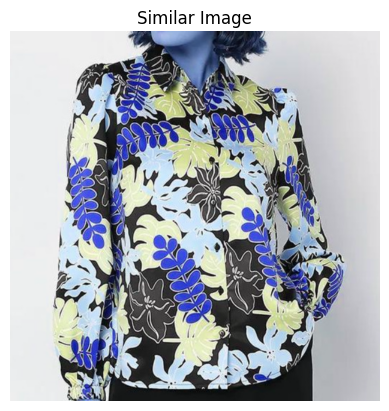

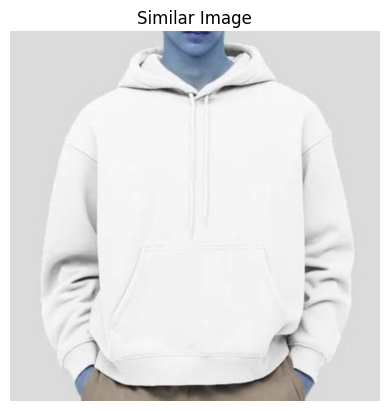

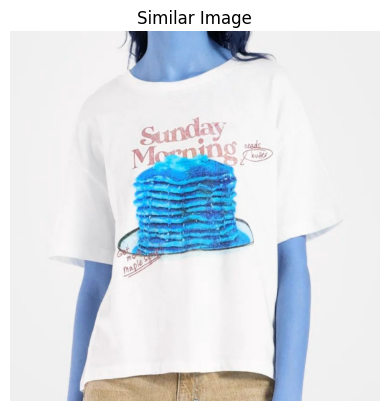

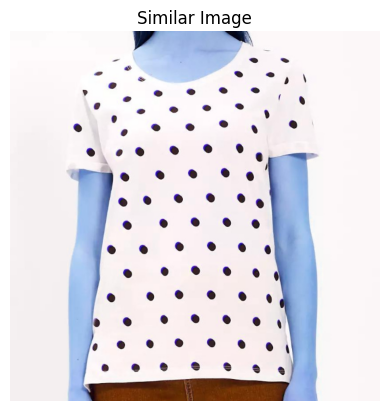

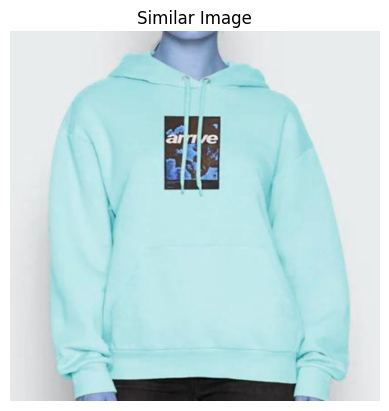

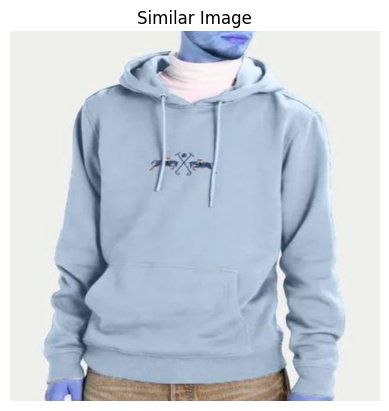

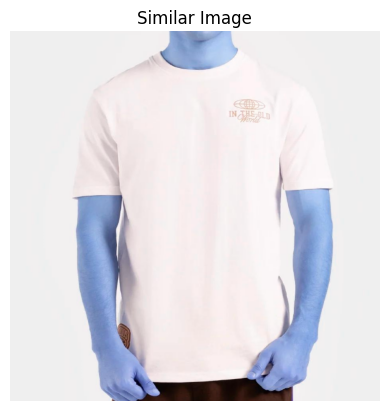

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Assume flattened_images_normalized contains normalized flattened images
# Assume features contains the extracted features using the trained model

# Calculate the similarity matrix
similarity_matrix = cosine_similarity(features_cnn)

# Example: Retrieve top three similar items for the first image
query_image_index = 9 #20
similar_images_indices = np.argsort(similarity_matrix[query_image_index])[::-1][1:8]  # Exclude the query image itself

# Plot the query image
plt.imshow(all_images[query_image_index])  # Assuming images are reshaped to original dimensions
plt.title('Query Image')
plt.axis('off')
plt.show()

# Plot the top three similar images
for idx in similar_images_indices:
    plt.imshow(all_images[idx])  # Assuming images are reshaped to original dimensions
    plt.title('Similar Image')
    plt.axis('off')
    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False,pooling=max, input_shape=(640, 640, 3))


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


def preprocess_image(img_array):
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


def extract_features(img_array):
    img_array = preprocess_image(img_array)
    features = model.predict(img_array)
    return features.flatten()

image_arrays = all_images

features_list = [extract_features(img_array) for img_array in image_arrays]

features_array = np.array(features_list)



In [ ]:
similarity_matrix = cosine_similarity(features_array)

#worst=9
query_image_index =11 #3 #11 #20
similar_images_indices = np.argsort(similarity_matrix[query_image_index])[::-1][1:8]  # Exclude the query image itself

# Plot the query image
plt.imshow(all_images[query_image_index])  # Assuming images are reshaped to original dimensions
plt.title('Query Image')
plt.axis('off')
plt.show()

# Plot the top three similar images
for idx in similar_images_indices:
    plt.imshow(all_images[idx])  # Assuming images are reshaped to original dimensions
    plt.title('Similar Image')
    plt.axis('off')
    plt.show()


In [ ]:
similar_images_indices

array([10,  7, 35, 21,  4,  1, 20])

**# RESNET**



In [4]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='max')


94765736/94765736 [==============================] - 1s 0us/step


In [5]:

processed_images = preprocess_input(all_images.astype(np.float32))
features = resnet_model.predict(processed_images)


similarity_matrix = cosine_similarity(features)


2/2 [==============================] - 8s 926ms/step


In [11]:
type(features),type(similarity_matrix)

(numpy.ndarray, numpy.ndarray)

In [12]:



file_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/features_and_similarity/similarity_matrix'

# Save the similarity matrix to the specified directory
np.save(file_path, similarity_matrix)




In [13]:



file_path = '/content/drive/MyDrive/FINAL_YEAR_PROJECT/features_and_similarity/features'

# Save the similarity matrix to the specified directory
np.save(file_path, features)




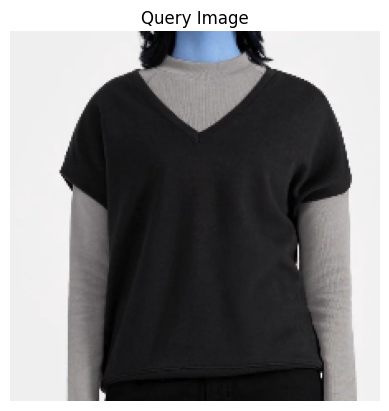

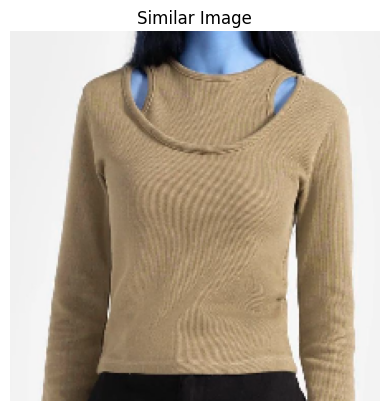

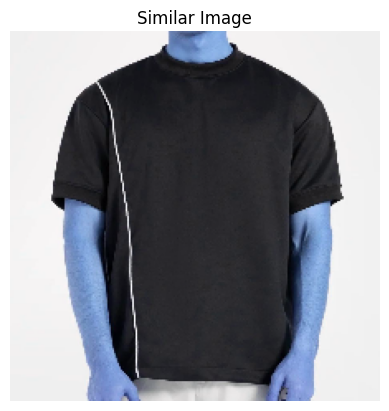

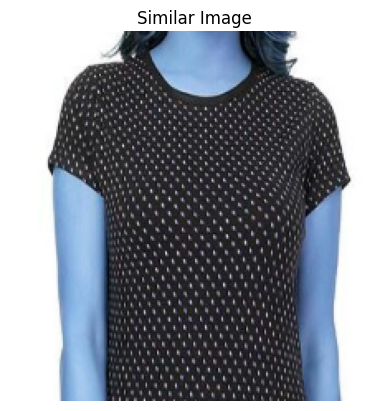

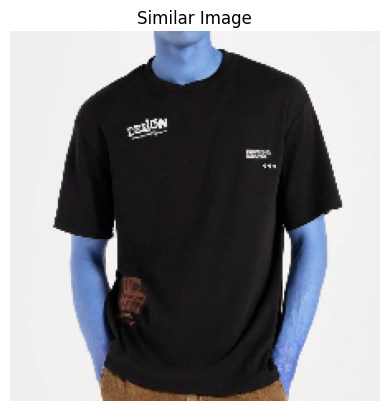

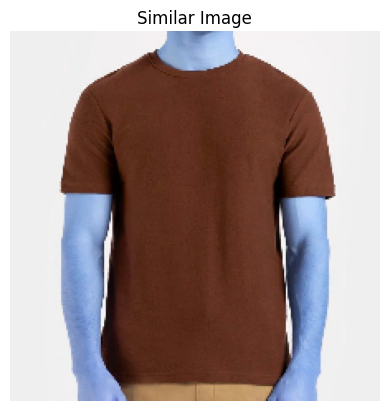

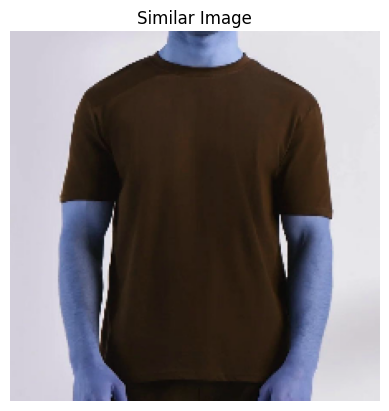

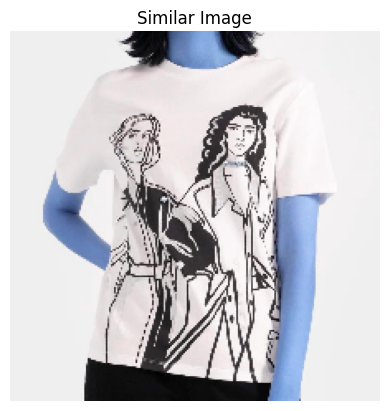

In [9]:


#worst=9,0
query_image_index =19#9 #29 #34 #12 #3 #11 #20
similar_images_indices = np.argsort(similarity_matrix[query_image_index])[::-1][1:8]  # Exclude the query image itself

# Plot the query image
plt.imshow(all_images[query_image_index])  # Assuming images are reshaped to original dimensions
plt.title('Query Image')
plt.axis('off')
plt.show()

# Plot the top three similar images
for idx in similar_images_indices:
    plt.imshow(all_images[idx])  # Assuming images are reshaped to original dimensions
    plt.title('Similar Image')
    plt.axis('off')
    plt.show()


In [8]:
similar_images_indices

array([ 7,  9, 35, 10, 19,  4, 29])

1/1 [==============================] - 0s 188ms/step


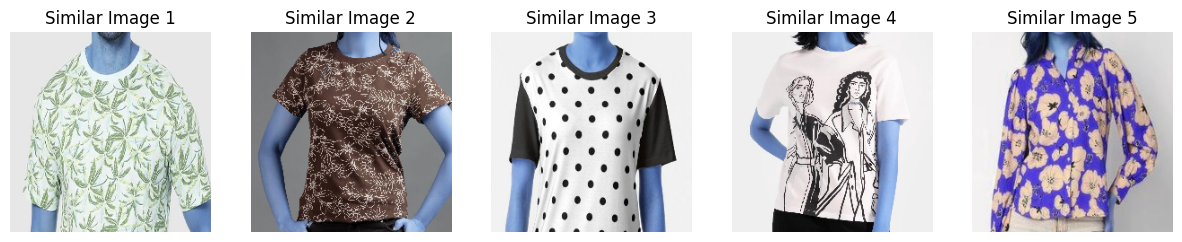

In [10]:
import matplotlib.pyplot as plt
from PIL import Image


# Load and preprocess the new image
#new_image_path =
new_img = cv2.imread('/content/drive/MyDrive/FINAL_YEAR_PROJECT/images_for_testing/floral_crop.JPG')
new_image=cv2.resize(new_img,(224, 224))
new_image = np.array(new_image)
processed_new_image = preprocess_input(np.expand_dims(new_image, axis=0))


# Extract features using the pre-trained model
features_new_image = resnet_model.predict(processed_new_image)


# Compute similarity between the new image and images in your dataset
similarities = cosine_similarity(features_new_image, features)

# Find top 5 similar images
top_5_indices = np.argsort(similarities[0])[::-1][:5]

# Plot the similar images
plt.figure(figsize=(15, 5))
for i, index in enumerate(top_5_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(all_images[index])
    plt.title(f'Similar Image {i+1}')
    plt.axis('off')
plt.show()


In [56]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Define data augmentation parameters
datagen = ImageDataGenerator(
    #rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    # fill_mode='nearest'
)

# Apply data augmentation and feature extraction in a loop
all_features = []
for images in datagen.flow(all_images.astype(np.float32), batch_size=1):  # Adjust batch size as needed
    processed_images = preprocess_input(images)
    features = resnet_model.predict(processed_images)
    all_features.append(features)

# Concatenate features into a single array
all_features = np.concatenate(all_features)

# Calculate similarity matrix
similarity_matrix = cosine_similarity(all_features)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 193ms/step


KeyboardInterrupt: 

In [ ]:
import faiss
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define image sizes and data
img_width, img_height = 224, 224  # Adjust if needed
selected_images = your_subset_of_images  # Array of selected images

# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Extract features and normalize
all_features = []
image_ids = []
for images in datagen.flow(selected_images.astype(np.float32), batch_size=32):
    processed_images = preprocess_input(images)
    features = resnet_model.predict(processed_images)
    all_features.append(features)
    image_ids.extend(range(len(features)))  # Assuming IDs correspond to image indices

all_features = np.concatenate(all_features)
# Normalize features (e.g., L2 normalization)
all_features /= np.linalg.norm(all_features, axis=1).reshape(-1, 1)

# Create FAISS index
faiss_index = faiss.IndexFlatL2(all_features.shape[1])
faiss_index.add(all_features)

# Save features and image IDs for future use
np.save("pre_extracted_features.npy", all_features)
np.save("image_ids.npy", image_ids)

# Query processing example:
def search_similar_images(query_image):
    # Preprocess query image
    query_image = preprocess_input(np.expand_dims(query_image, axis=0))
    # Extract features with augmentation
    query_features = resnet_model.predict(datagen.flow(query_image))
    # Normalize query features
    query_features /= np.linalg.norm(query_features, axis=1).reshape(-1, 1)
    # Search
    distances, indices = faiss_index.search(query_features, k=5)
    # Retrieve image IDs and process results based on your application logic
    similar_image_ids = [image_ids[i] for i in indices[0]]
    # ...

# Example usage:
query_image = ...  # Load your query image
search_similar_images(query_image)
